The objective for data analysis. I am assuming the role of a product analyst at a mobile application company. I have just finished running an A/B test surrounding two variants of a key feature. The data received was CTR and Average Time Spent in minutes along with some demographic qualifiers.

My Approach will be to prepare a data analysis report with each step annotated so that someone in the future will be able to understand my code.

The report will aim to complete the tasks listed:

1. Analyze the results to determine which feature (if any) results in CTR or Time Spent lift.

2. Conduct statistical testing to determine if there is a statistically significant difference between the features and the control group.

3. Summarize your results. Make a recommendation to the engineering team about which feature to deploy. 

4. Create a roll-out plan. How quickly will you introduce the feature to your audience?

In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats
from scipy import stats

Firstly all the necessary python libraries will be imported

In [25]:
df = pd.read_csv("https://raw.githubusercontent.com/ajkam/schulich_data_science/main/Assignment%202/experiment_dataset.csv")

Then the dataset will be read by python to be put into a pandas data frame. The data is located on my github.

# Step 1: Analyze the results to determine if there is any lift

This will help us understand if the Variant has resulted in any change in the key metrics CTR and Time Spent that were tracked throughout the experiment.

In [59]:
df.head(20)

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579
5,5,27,Location3,Device1,Variant B,26.129246,0.149341
6,6,37,Location3,Device3,Variant B,20.525362,0.095788
7,7,39,Location2,Device1,Variant A,21.525217,0.149985
8,8,54,Location3,Device2,Control,21.910608,0.135535
9,9,41,Location1,Device2,Variant A,27.642788,0.137266


View the first 20 rows of data to get an idea of what we are working with

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Age         1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Device      1000 non-null   object 
 4   Variant     1000 non-null   object 
 5   Time Spent  1000 non-null   float64
 6   CTR         1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


Understand key information about the dataset

In [28]:
df.describe()

,Unnamed: 0,Age,Time Spent,CTR
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,40.715000,22.713345,0.109145
std,288.819436,13.655557,5.479292,0.022366
min,0.000000,18.000000,7.114806,0.012975
25%,249.750000,28.000000,19.216608,0.094286
50%,499.500000,41.000000,22.506707,0.108944
75%,749.250000,53.000000,26.255950,0.124238
max,999.000000,64.000000,39.395770,0.172728


Describe the main measures of central tendency and other important factors of the dataset

In [29]:
print(df['Location'].unique())

['Location2' 'Location1' 'Location3']


Understand how many unique locations there are

In [30]:
print(df['Device'].unique())

['Device2' 'Device1' 'Device3']


Understand how many unique devices there are

In [31]:
print(df['Age'].unique())

[62 18 21 57 27 37 39 54 41 24 42 30 19 56 64 35 55 43 31 26 38 34 23 33
 36 53 47 32 50 49 28 29 46 52 58 22 59 60 45 48 61 20 40 44 63 51 25]


Understand how many unique Ages there are

In [32]:
print(df['Variant'].unique())

['Control' 'Variant B' 'Variant A']


Understand how many unique Variants are

In [33]:
Variant_A = df[df.Variant == 'Variant A']
Variant_A.describe()

,Unnamed: 0,Age,Time Spent,CTR
count,330.000000,330.000000,330.000000,330.000000
mean,503.448485,39.778788,24.805547,0.120269
std,292.544666,13.335836,4.964324,0.020109
min,7.000000,18.000000,7.800901,0.065667
25%,267.250000,28.000000,21.353587,0.107731
50%,492.000000,39.000000,24.955120,0.120203
75%,753.000000,51.000000,28.361732,0.134230
max,993.000000,64.000000,39.246751,0.172728


Create a Dataframe that contains the data where the Variant column is Variant A. The mean for time spent is 24.81 and the mean for CTR is 0.12. Note that the count is 330 so out of the 1000 data sample 330 users experienced Variant A.

In [34]:
Variant_B = df[df.Variant == 'Variant B']
Variant_B.describe()

,Unnamed: 0,Age,Time Spent,CTR
count,330.000000,330.000000,330.000000,330.000000
mean,499.427273,41.466667,23.343783,0.108933
std,287.500859,13.931676,5.239965,0.020988
min,1.000000,18.000000,9.681810,0.041402
25%,236.500000,29.000000,19.941617,0.095024
50%,513.500000,42.000000,23.198123,0.109100
75%,748.750000,53.000000,26.604511,0.123861
max,999.000000,64.000000,39.395770,0.166768


Create a Dataframe that contains the data where the Variant column is Variant B. The mean for time spent is 23.34 and the mean for CTR is 0.12. Note that the count is 330 so out of the 1000 data sample 330 users experienced Variant B.

In [35]:
Control = df[df.Variant == 'Control']
Control.describe()

,Unnamed: 0,Age,Time Spent,CTR
count,340.000000,340.000000,340.000000,340.000000
mean,495.738235,40.894118,20.070781,0.098554
std,287.254421,13.679236,5.124183,0.020523
min,0.000000,18.000000,7.114806,0.012975
25%,248.000000,28.000000,16.516020,0.084686
50%,484.000000,41.000000,20.337480,0.098895
75%,737.500000,53.000000,23.313397,0.111160
max,997.000000,64.000000,37.527368,0.168363


Create a Dataframe that contains the data where the Variant column is Control. The mean for time spent is 20.07 and the mean for CTR is 0.10. Note that the count is 340 so out of the 1000 data sample 330 users experienced no Variant as they were a part of the Control Group.

In [65]:
df[['Time Spent', 'CTR']].max()




Time Spent    39.395770
CTR            0.172728
dtype: float64

Find the max of Time Spent and CTR. What is intereseting to note is that the Max Value of CTR does not even exceed 0.2. This demonstrates that most users have not come close to fully clicking throught the feature regardless of Variant.

In [66]:
df[['Time Spent', 'CTR']].min()

Time Spent    7.114806
CTR           0.012975
dtype: float64

Find the min of Time Spent and CTR.

In [36]:
df.loc[df['Variant'] == 'Variant A', ['Time Spent', 'CTR']].mean()



Time Spent    24.805547
CTR            0.120269
dtype: float64

Find the mean of Time Spent and CTR for Variant A

In [37]:
df.loc[df['Variant'] == 'Variant B', ['Time Spent', 'CTR']].mean()


Time Spent    23.343783
CTR            0.108933
dtype: float64

Find the mean of Time Spent and CTR for Variant B. Note that the means for both Time Spent and CTR are less than Variant A.

In [38]:
df.loc[df['Variant'] == 'Control', ['Time Spent', 'CTR']].mean()


Time Spent    20.070781
CTR            0.098554
dtype: float64

Find the mean of Time Spent and CTR for Control Group. Note that the means for both Time Spent and CTR are less than Variant A and Variant B. Note that CTR drops below 0.1 in the Control Group.

In [78]:
df.groupby('Variant')[['Time Spent']].mean()


,Time Spent
Variant,
Control,20.070781
Variant A,24.805547
Variant B,23.343783


Summarize all the means for time spent.

In [79]:
df.groupby('Variant')[['CTR']].mean()


,CTR
Variant,
Control,0.098554
Variant A,0.120269
Variant B,0.108933


Summarize all the means for CTR.

In [39]:
Lift_A = df.loc[df['Variant'] == 'Variant A', ['Time Spent', 'CTR']].mean() - df.loc[df['Variant'] == 'Control', ['Time Spent', 'CTR']].mean()
Lift_A



Time Spent    4.734766
CTR           0.021715
dtype: float64

Find the Lift of CTR and Time Spent for Variant A v Control. This is done by using the loc function and a condition on the df to ensure it selects the values for the Variant column that are equal to Variant A then finding the mean for Time Spent and CTR. Then the above step is repeated for the Control Group. Finally the Variant A subset has the Control Group subset subtracted from it. This gives us the lift for Variant A versus Control Group for the CTR and Time Spent.

In [69]:
Lift_A_per = Lift_A / df.loc[df['Variant'] == 'Control', ['Time Spent', 'CTR']].mean() * 100
Lift_A_per

Time Spent    23.590344
CTR           22.033917
dtype: float64

This divides th Lift_A means by the Control Group means and multiplies by 100 to find the percent increases in average Time Spent and CTR between A and the Control Group.



In [74]:
Lift_B = df.loc[df['Variant'] == 'Variant B', ['Time Spent', 'CTR']].mean() - df.loc[df['Variant'] == 'Control', ['Time Spent', 'CTR']].mean() 
Lift_B

Time Spent    3.273002
CTR           0.010379
dtype: float64

Find the Lift of CTR and Time Spent for Variant A v Control. This is done by repeating the above stesp but by switching Variant A for Variant B.

Note that the lift values are different for Variant A and Variant B. Variant A lift values seem to be greater as shown.

In [76]:
Lift_B_per = Lift_B / df.loc[df['Variant'] == 'Control', ['Time Spent', 'CTR']].mean() * 100
Lift_B_per

Time Spent    16.307297
CTR           10.531151
dtype: float64

This follows the same steps to find the percent increase just swtich for Variant B. Note that the increase for Variant A were above 20% for both CTR and Time Spent. This could be a good or bad thing depeding on the interpretation of the metric.

In [41]:
Lift_AvB= df.loc[df['Variant'] == 'Variant A', ['Time Spent', 'CTR']].mean() - df.loc[df['Variant'] == 'Variant B', ['Time Spent', 'CTR']].mean()
Lift_AvB


Time Spent    1.461764
CTR           0.011336
dtype: float64

Find the Lift of CTR and Time Spent for Variant A v Variant B. This is done by repeating the above stesp.

Note that the lift values are positive for Variant A compared Variant B. This is expected as Variant A was seen as graeter in the previous analysis.

In [77]:
Lift_AvB_per = Lift_AvB / df.loc[df['Variant'] == 'Variant B', ['Time Spent', 'CTR']].mean() * 100
Lift_AvB_per




Time Spent     6.261900
CTR           10.406809
dtype: float64

This follows the same steps to find the percent increase just swtich. 
This shows that users in Variant A spend on average 6% more time then Variant B and 23% more than the control group.
This also shows that users in Variant A are 10% closer to clicking through the entire feature  than Variant B and 22% closer than the Control Group.

# Step 2

In the previous step we took the time to understand the dataset. From this we identified that there was change in the key metrics CTR and Time Spent that were tracked throughout the experiment based on the Variants A and B to the feature.

We found that Variant A has a higher time spent and CTR than Variant B and the control group.
Now we need to see if these changes are statistically signficnat.

To do this we need to split up step 2 into two parts.

Firstly we need to figure out if any factors other than the Variant are affecting the dataset.
To do this we will use a One-Way Anova to calculate the F distribution to see if the means for Age, Device, and Location are the same across both metrics. The aim is for there to be no statistically significant difference and for the p value to be high. This is because if the opposite is true and there is a statistically significant difference then another factor is causing change to our data which clouds the results we can get from the experiment. 

It might lead to us selecting the wrong Variant to implement if this step was not implemented. 
However, if this step reveals a p-value close to alpha of 0.05 it might lead us to make changes to the rollout plan of the feature.

Secondly we need to figure out if the Variant has a statistically signficant change.  This will help us understand if the lift changes from above are represent of the population. If there a statistically signifcant change for Time Spent and CTR then we will have a low p-value.  If the change is statistically significant it means we can make business decisions picking which Variant the engineers should implement. 

In [46]:
df.var(numeric_only=True)


Unnamed: 0    83416.666667
Age             186.474249
Time Spent       30.022642
CTR               0.000500
dtype: float64

Check variance to ensure homoscedasticity to ensure parametric measures can be used for time sspent and CTR

In [47]:
Variant_A.var(numeric_only=True)

Unnamed: 0    85582.381837
Age             177.844533
Time Spent       24.644508
CTR               0.000404
dtype: float64

Time Spent and CTR variance are slightly different

In [48]:
Variant_B.var(numeric_only=True)

Unnamed: 0    82656.743935
Age             194.091591
Time Spent       27.457230
CTR               0.000440
dtype: float64

Time Spent and CTR variance are slightly different

In [49]:
Control.var(numeric_only=True)

Unnamed: 0    82515.102369
Age             187.121499
Time Spent       26.257248
CTR               0.000421
dtype: float64

Time Spent and CTR variance are slightly different

It seems that parametric measures can be used.

In [53]:
df.groupby('Location')[['Time Spent', 'CTR']].mean()


,Time Spent,CTR
Location,,
Location1,22.707286,0.110217
Location2,22.648998,0.108517
Location3,22.787691,0.108708


Understand whether the mean time spent and CTR varies by location. There seems to be marginal varaition in Location as Location 2 is 22.6 whereas Location3 is 22.8. There seems to be marginal variation in CTR as Location1 is 0.11 whereas the others are 0.108.

In [54]:
df.groupby('Device')[['Time Spent', 'CTR']].mean()


,Time Spent,CTR
Device,,
Device1,22.635032,0.109634
Device2,22.890021,0.109868
Device3,22.612276,0.107993


Understand whether the mean time spent and CTR varies by device. There seems to be marginal variation in Time Spent as Device1 in 22.6 whereas Device 2 is 22.9. There seems to be almost no variation in CTR as Device3 is 0.11 whereas the others are 0.108.

In [55]:
df.groupby('Age')[['Time Spent', 'CTR']].mean()


,Time Spent,CTR
Age,,
18,21.805160,0.104431
19,24.301099,0.113928
20,22.658484,0.106769
21,23.174444,0.106317
22,23.339777,0.111566
23,21.203465,0.111024
24,21.505956,0.109765
25,23.541231,0.109907
26,22.598906,0.110061


Understand whether the mean time spent and CTR varies by age. There is slight variation in time spent as the highest average time spent is 25.3 while the lowest is 20.8. There is also slight variation in CTR spent as the highest average time spent is 0.12 while the lowest is 0.099.

Since Age, Device, and Location have no significnat variation based on their averages we need to validate if there is statistically no variation. To do this an ANOVA test will be used as it can test if the means of three+ independent groups are different. In this cae we are considering Age, Device, and Location to contain their own independent groups and we want to see if there averages (mean) are the same. Therefore our ANOVA test will have a high value.

In [56]:
Loc_1 = df[df['Location'] == 'Location1']['Time Spent']
Loc_2 = df[df['Location'] == 'Location2']['Time Spent']
Loc_3 = df[df['Location'] == 'Location3']['Time Spent']

p_val = stats.f_oneway(Loc_1, Loc_2, Loc_3)
print(p_val)

F_onewayResult(statistic=0.053578839670573676, pvalue=0.9478339402848069)


To create the setup for ANOVA. A dataframe for each Location was created that stored the values for time spent. Then each dataframe was inputted as arguments in  spciy stats f_oneway function that creates a oneway ANOVA. The output was printed. The following steps were repeated for the rest of the ANOVA with slight changes based on the labels and quanity for variables.

P-Value is high as desired so Location mean has no statistically significnat change in their averages for time spent.

In [80]:
Loc_1 = df[df['Location'] == 'Location1']['CTR']
Loc_2 = df[df['Location'] == 'Location2']['CTR']
Loc_3 = df[df['Location'] == 'Location3']['CTR']

p_val = stats.f_oneway(Loc_1, Loc_2, Loc_3)
print(p_val)

F_onewayResult(statistic=0.5792245145655729, pvalue=0.5605211716238133)


P-Value is high as desired so Location mean has no statistically significnat change in their averages for click through rate.

In [100]:
Dev_1 = df[df['Device'] == 'Device1']['Time Spent']
Dev_2 = df[df['Device'] == 'Device2']['Time Spent']
Dev_3 = df[df['Device'] == 'Device3']['Time Spent']

p_val = stats.f_oneway(Dev_1, Dev_2, Dev_3)
print(p_val)

F_onewayResult(statistic=0.26645371811833884, pvalue=0.7661459958744103)


P-Value is high as desired so Device mean has no statistically significnat change in their averages for time spent.

In [89]:
Dev_1 = df[df['Device'] == 'Device1']['CTR']
Dev_2 = df[df['Device'] == 'Device2']['CTR']
Dev_3 = df[df['Device'] == 'Device3']['CTR']

p_val = stats.f_oneway(Dev_1, Dev_2, Dev_3)
print(p_val)

F_onewayResult(statistic=0.7105872492654717, pvalue=0.4916042399968955)


P-Value is high as desired so Location mean has no statistically significnat change in their averages for click through rate.

In [94]:
Age_18 = df[df['Age']== 18]['Time Spent']
Age_19 = df[df['Age']== 19]['Time Spent']
Age_20 = df[df['Age']== 20]['Time Spent']
Age_21 = df[df['Age']== 21]['Time Spent']
Age_22 = df[df['Age']== 22]['Time Spent']
Age_23 = df[df['Age']== 23]['Time Spent']
Age_24 = df[df['Age']== 24]['Time Spent']
Age_25 = df[df['Age']== 25]['Time Spent']
Age_26 = df[df['Age']== 26]['Time Spent']
Age_27 = df[df['Age']== 27]['Time Spent']
Age_28 = df[df['Age']== 28]['Time Spent']
Age_29 = df[df['Age']== 29]['Time Spent']
Age_30 = df[df['Age']== 30]['Time Spent']
Age_31 = df[df['Age']== 31]['Time Spent']
Age_32 = df[df['Age']== 32]['Time Spent']
Age_33 = df[df['Age']== 33]['Time Spent']
Age_34 = df[df['Age']== 34]['Time Spent']
Age_35 = df[df['Age']== 35]['Time Spent']
Age_36 = df[df['Age']== 36]['Time Spent']
Age_37 = df[df['Age']== 37]['Time Spent']
Age_38 = df[df['Age']== 38]['Time Spent']
Age_39 = df[df['Age']== 39]['Time Spent']
Age_40 = df[df['Age']== 40]['Time Spent']
Age_41 = df[df['Age']== 41]['Time Spent']
Age_42 = df[df['Age']== 42]['Time Spent']
Age_43 = df[df['Age']== 43]['Time Spent']
Age_44 = df[df['Age']== 44]['Time Spent']
Age_45 = df[df['Age']== 45]['Time Spent']
Age_46 = df[df['Age']== 46]['Time Spent']
Age_47 = df[df['Age']== 47]['Time Spent']
Age_48 = df[df['Age']== 48]['Time Spent']
Age_49 = df[df['Age']== 49]['Time Spent']
Age_50 = df[df['Age']== 50]['Time Spent']
Age_51 = df[df['Age']== 51]['Time Spent']
Age_52 = df[df['Age']== 52]['Time Spent']
Age_53 = df[df['Age']== 53]['Time Spent']
Age_54 = df[df['Age']== 54]['Time Spent']
Age_55 = df[df['Age']== 55]['Time Spent']
Age_56 = df[df['Age']== 56]['Time Spent']
Age_57 = df[df['Age']== 57]['Time Spent']
Age_58 = df[df['Age']== 58]['Time Spent']
Age_59 = df[df['Age']== 59]['Time Spent']
Age_60 = df[df['Age']== 60]['Time Spent']
Age_61 = df[df['Age']== 61]['Time Spent']
Age_62 = df[df['Age']== 62]['Time Spent']
Age_63 = df[df['Age']== 63]['Time Spent']
Age_64 = df[df['Age']== 64]['Time Spent']

p_val = stats.f_oneway(Age_18 ,
Age_19 ,
Age_20 ,
Age_21 ,
Age_22 ,
Age_23 ,
Age_24 ,
Age_25 ,
Age_26 ,
Age_27 ,
Age_28 ,
Age_29 ,
Age_30 ,
Age_31 ,
Age_32 ,
Age_33 ,
Age_34 ,
Age_35 ,
Age_36 ,
Age_37 ,
Age_38 ,
Age_39 ,
Age_40 ,
Age_41 ,
Age_42 ,
Age_43 ,
Age_44 ,
Age_45 ,
Age_46 ,
Age_47 ,
Age_48 ,
Age_49 ,
Age_50 ,
Age_51 ,
Age_52 ,
Age_53 ,
Age_54 ,
Age_55 ,
Age_56 ,
Age_57 ,
Age_58 ,
Age_59 ,
Age_60 ,
Age_61 ,
Age_62 ,
Age_63 ,
Age_64 
)
print(p_val)




F_onewayResult(statistic=1.0742039789844577, pvalue=0.34343140059340505)


P-Value is high as desired so Age mean has no statistically significnat change in their averages for time spent. However the P-Value is much lower when compared to Device and Location. This might indicate that Time Spent is not a metric that we should focus on as Age has influence althought not a statistically significant influence.

In [95]:
Age_18 = df[df['Age']== 18]['CTR']
Age_19 = df[df['Age']== 19]['CTR']
Age_20 = df[df['Age']== 20]['CTR']
Age_21 = df[df['Age']== 21]['CTR']
Age_22 = df[df['Age']== 22]['CTR']
Age_23 = df[df['Age']== 23]['CTR']
Age_24 = df[df['Age']== 24]['CTR']
Age_25 = df[df['Age']== 25]['CTR']
Age_26 = df[df['Age']== 26]['CTR']
Age_27 = df[df['Age']== 27]['CTR']
Age_28 = df[df['Age']== 28]['CTR']
Age_29 = df[df['Age']== 29]['CTR']
Age_30 = df[df['Age']== 30]['CTR']
Age_31 = df[df['Age']== 31]['CTR']
Age_32 = df[df['Age']== 32]['CTR']
Age_33 = df[df['Age']== 33]['CTR']
Age_34 = df[df['Age']== 34]['CTR']
Age_35 = df[df['Age']== 35]['CTR']
Age_36 = df[df['Age']== 36]['CTR']
Age_37 = df[df['Age']== 37]['CTR']
Age_38 = df[df['Age']== 38]['CTR']
Age_39 = df[df['Age']== 39]['CTR']
Age_40 = df[df['Age']== 40]['CTR']
Age_41 = df[df['Age']== 41]['CTR']
Age_42 = df[df['Age']== 42]['CTR']
Age_43 = df[df['Age']== 43]['CTR']
Age_44 = df[df['Age']== 44]['CTR']
Age_45 = df[df['Age']== 45]['CTR']
Age_46 = df[df['Age']== 46]['CTR']
Age_47 = df[df['Age']== 47]['CTR']
Age_48 = df[df['Age']== 48]['CTR']
Age_49 = df[df['Age']== 49]['CTR']
Age_50 = df[df['Age']== 50]['CTR']
Age_51 = df[df['Age']== 51]['CTR']
Age_52 = df[df['Age']== 52]['CTR']
Age_53 = df[df['Age']== 53]['CTR']
Age_54 = df[df['Age']== 54]['CTR']
Age_55 = df[df['Age']== 55]['CTR']
Age_56 = df[df['Age']== 56]['CTR']
Age_57 = df[df['Age']== 57]['CTR']
Age_58 = df[df['Age']== 58]['CTR']
Age_59 = df[df['Age']== 59]['CTR']
Age_60 = df[df['Age']== 60]['CTR']
Age_61 = df[df['Age']== 61]['CTR']
Age_62 = df[df['Age']== 62]['CTR']
Age_63 = df[df['Age']== 63]['CTR']
Age_64 = df[df['Age']== 64]['CTR']

p_val = stats.f_oneway(Age_18 ,
Age_19 ,
Age_20 ,
Age_21 ,
Age_22 ,
Age_23 ,
Age_24 ,
Age_25 ,
Age_26 ,
Age_27 ,
Age_28 ,
Age_29 ,
Age_30 ,
Age_31 ,
Age_32 ,
Age_33 ,
Age_34 ,
Age_35 ,
Age_36 ,
Age_37 ,
Age_38 ,
Age_39 ,
Age_40 ,
Age_41 ,
Age_42 ,
Age_43 ,
Age_44 ,
Age_45 ,
Age_46 ,
Age_47 ,
Age_48 ,
Age_49 ,
Age_50 ,
Age_51 ,
Age_52 ,
Age_53 ,
Age_54 ,
Age_55 ,
Age_56 ,
Age_57 ,
Age_58 ,
Age_59 ,
Age_60 ,
Age_61 ,
Age_62 ,
Age_63 ,
Age_64 
)
print(p_val)

F_onewayResult(statistic=0.9242462642861573, pvalue=0.6176826678261718)


P-Value is high as desired so Location mean has no statistically significnat change in their averages for click through rate.

# Note for improvement:
 As an entry level product analyst I used excel find and replace to iterate the first part of the code. And then I used text to columns to get the Age_# section by itself. Then I used a formula to add a comma at the end except for Age_64. Finally I used find and replace again to change it from Time Spent to CTR. Is it possible to write this with a for loop because I tried using df.iteruples() but I think I am missing something.

 Furthemore, because of this I decided not to include graphs as I concluded it would be too much effort to see the 46 different age groups and compare each individual distirbution much less plot them all on the same distribution.

# End of Step 2 Part 1 and Start of Part 2

The previous results have revealed that none of the means are statistically significnat across the groups tested. However Age and Time Spent had the lowest p-value which might reveal some information when deciding how to rollout the feature because Age somewhat influences time spent.

To begin part two we will move on to assesing the effets of the Variants.
In comparison to the last section we desired a high p-value we would prefer a low p-value below the confidence level of alpha =0.05. This will show that there a statistically signficant change. T

In [104]:
Var_A = df[df['Variant'] == 'Variant A']['CTR']
Var_B = df[df['Variant'] == 'Variant B']['CTR']
Cont = df[df['Variant'] == 'Control']['CTR']

p_val = stats.f_oneway(Var_A, Var_B, Cont)
print(p_val)

F_onewayResult(statistic=93.58891593622702, pvalue=5.638952705781554e-38)


This runs a oneway anova to see if there a statistically significnat difference between all averages for CTR. Since the p-value is below alpha there is a difference. However this does not verify if Variant A or Variant B is better based on the lift data.

In [105]:
Var_A = df[df['Variant'] == 'Variant A']['Time Spent']
Var_B = df[df['Variant'] == 'Variant B']['Time Spent']
Cont = df[df['Variant'] == 'Control']['Time Spent']

p_val = stats.f_oneway(Var_A, Var_B, Cont)
print(p_val)

F_onewayResult(statistic=75.60840947416146, pvalue=2.676826588910432e-31)


This runs a oneway anova to see if there a statistically significnat difference between all averages for time spent. Since the p-value is below alpha there is a difference. However this does not verify if Variant A or Variant B is better based on the lift data.

In [106]:
Var_A = df[df['Variant'] == 'Variant A']['CTR']
Var_B = df[df['Variant'] == 'Variant B']['CTR']
Cont = df[df['Variant'] == 'Control']['CTR']

p_val = stats.ttest_ind(Var_A, Cont)
p_val2 = stats.ttest_ind(Var_B, Cont)
p_val3 = stats.ttest_ind(Var_A, Var_B)
print(p_val)
print(p_val2)
print(p_val3)

Ttest_indResult(statistic=13.829424737499187, pvalue=1.9602781373243157e-38)
Ttest_indResult(statistic=6.4718143491783255, pvalue=1.8743198199982106e-10)
Ttest_indResult(statistic=7.08499696316128, pvalue=3.587180487986577e-12)


This code uses the stats.ttest function to run a t-test based on the above for CTR. The three null hypothesis are that there is firstly no statistical difference between Var_A and Control. Then no statistical difference between Var_B and Control and lastly no statistical difference between Var_A and Var_B.

Since the p-values are all belove 0.05 we can say that we can reject all the null hypothesis making there be a statistically signficant difference between the means.

Below each t-test distribution is plotted to demonstrate a visual comparison of the results and show a statistically significnat difference in the mean.

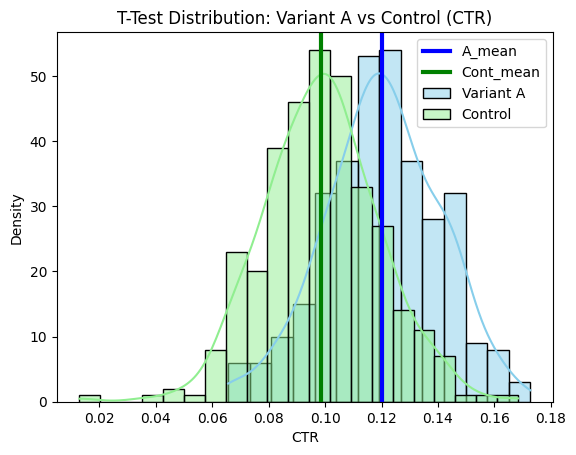

In [122]:
sns.histplot(data=Var_A,  color='skyblue', label='Variant A', kde= True)
sns.histplot(data=Cont, color='lightgreen', label='Control', kde= True)


A_mean= Var_A.mean()
Cont_mean= Cont.mean()


plt.axvline(x=A_mean, linewidth=3, color='blue', label="A_mean")
plt.axvline(x=Cont_mean, linewidth=3, color='green', label="Cont_mean")


plt.xlabel('CTR')
plt.ylabel('Density')
plt.title('T-Test Distribution: Variant A vs Control (CTR)')

plt.legend()
plt.show()

This plot uses the seaborn library and matplotlib library to plot the distribution. 

Firstly a distribution was created using seaborn histplot. Within seaborn the colors were changed to be ligher more transparent versions of themsevles according to https://matplotlib.org/stable/gallery/color/named_colors.html. Then they were labelled for each group. Lastly with within seaborn the kde function was set to True which applies a density estimate.

https://www.statology.org/seaborn-normal-distribution/


Then the mean for each location was found. After which matplotlib was used to with a function called axvline to plot the man so that there was visibilty for the user to see how close the means of the distirubitons were. X was set to each of the means. Linewidth was set to three. The regulars color were left so they woudld stand out comparatively. The means were then labelled.

https://stackoverflow.com/questions/67613774/how-to-add-a-mean-and-median-line-to-a-seaborn-displot

Afterwards the axis labels and titles were plotted using matplotlib. A legend was also created. Finally the distribution was plotted.

The following steps were repeated for the rest of the t-distribution with slight changes based on the labels and change from CTR to Time Spent.

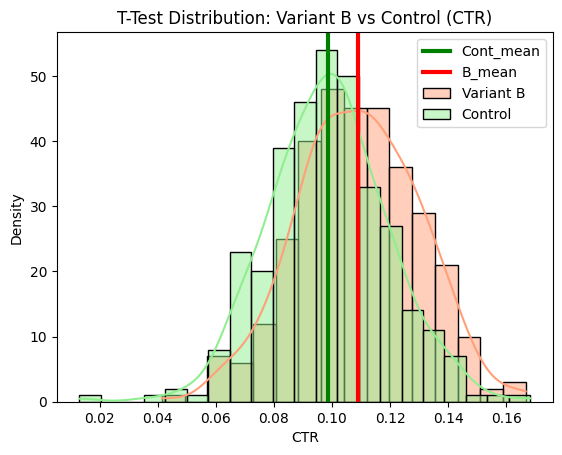

In [125]:
sns.histplot(data=Var_B,  color='lightsalmon', label='Variant B', kde= True)
sns.histplot(data=Cont, color='lightgreen', label='Control', kde= True)


B_mean= Var_B.mean()
Cont_mean= Cont.mean()


plt.axvline(x=Cont_mean, linewidth=3, color='green', label="Cont_mean")
plt.axvline(x=B_mean, linewidth=3, color='red', label="B_mean")


plt.xlabel('CTR')
plt.ylabel('Density')
plt.title('T-Test Distribution: Variant B vs Control (CTR)')

plt.legend()
plt.show()

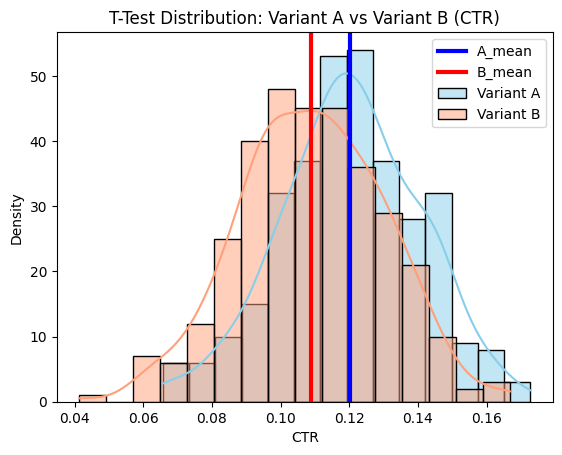

In [126]:
sns.histplot(data=Var_A,  color='skyblue', label='Variant A', kde= True)
sns.histplot(data=Var_B, color='lightsalmon', label='Variant B', kde= True)


A_mean= Var_A.mean()
B_mean= Var_B.mean()


plt.axvline(x=A_mean, linewidth=3, color='blue', label="A_mean")
plt.axvline(x=B_mean, linewidth=3, color='red', label="B_mean")


plt.xlabel('CTR')
plt.ylabel('Density')
plt.title('T-Test Distribution: Variant A vs Variant B (CTR)')

plt.legend()
plt.show()


In [127]:
Var_A = df[df['Variant'] == 'Variant A']['Time Spent']
Var_B = df[df['Variant'] == 'Variant B']['Time Spent']
Cont = df[df['Variant'] == 'Control']['Time Spent']

p_val = stats.ttest_ind(Var_A, Cont)
p_val2 = stats.ttest_ind(Var_B, Cont)
p_val3 = stats.ttest_ind(Var_A, Var_B)
print(p_val)
print(p_val2)
print(p_val3)

Ttest_indResult(statistic=12.142363487472364, pvalue=8.488565644996449e-31)
Ttest_indResult(statistic=8.174237395991806, pvalue=1.496358076285182e-15)
Ttest_indResult(statistic=3.6788175394209075, pvalue=0.0002534771014765265)


This code uses the stats.ttest function to run a t-test based on the above for Time Spent. The three null hypothesis are that there is firstly no statistical difference between Var_A and Control. Then no statistical difference between Var_B and Control and lastly no statistical difference between Var_A and Var_B.

Since the p-values are all belove 0.05 we can say that we can reject all the null hypothesis making there be a statistically signficant difference between the means.

Below each t-test distribution is plotted to demonstrate a visual comparison of the results and show a statistically significnat difference in the mean.

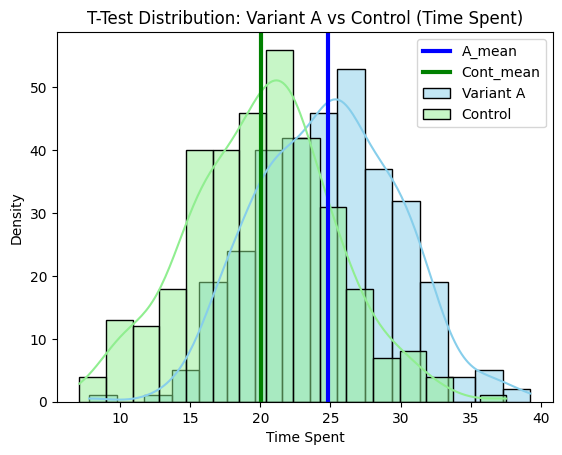

In [135]:
sns.histplot(data=Var_A,  color='skyblue', label='Variant A', kde= True)
sns.histplot(data=Cont, color='lightgreen', label='Control', kde= True)


A_mean= Var_A.mean()
Cont_mean= Cont.mean()


plt.axvline(x=A_mean, linewidth=3, color='blue', label="A_mean")
plt.axvline(x=Cont_mean, linewidth=3, color='green', label="Cont_mean")


plt.xlabel('Time Spent')
plt.ylabel('Density')
plt.title('T-Test Distribution: Variant A vs Control (Time Spent)')

plt.legend()
plt.show()


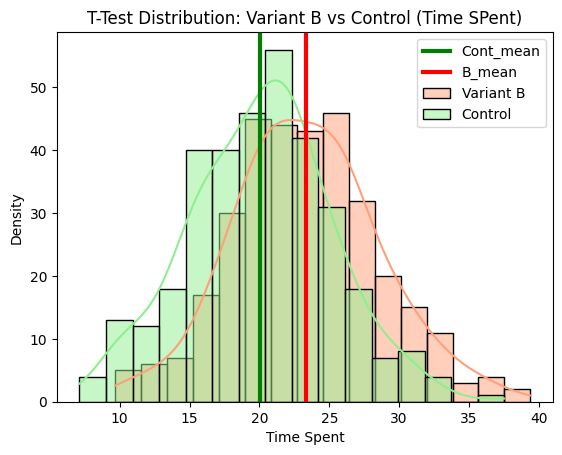

In [136]:
sns.histplot(data=Var_B,  color='lightsalmon', label='Variant B', kde= True)
sns.histplot(data=Cont, color='lightgreen', label='Control', kde= True)


B_mean= Var_B.mean()
Cont_mean= Cont.mean()


plt.axvline(x=Cont_mean, linewidth=3, color='green', label="Cont_mean")
plt.axvline(x=B_mean, linewidth=3, color='red', label="B_mean")


plt.xlabel('Time Spent')
plt.ylabel('Density')
plt.title('T-Test Distribution: Variant B vs Control (Time SPent)')

plt.legend()
plt.show()

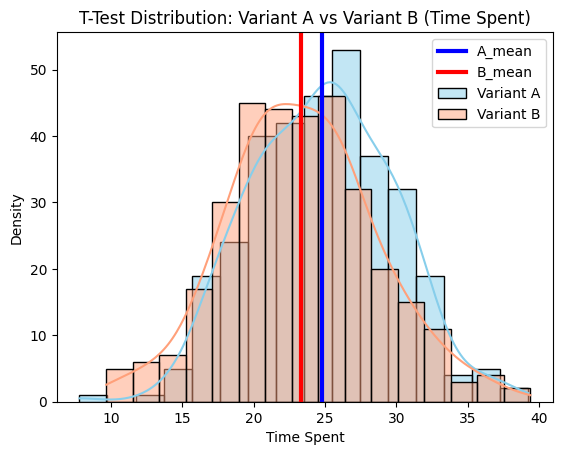

In [137]:
sns.histplot(data=Var_A,  color='skyblue', label='Variant A', kde= True)
sns.histplot(data=Var_B, color='lightsalmon', label='Variant B', kde= True)


A_mean= Var_A.mean()
B_mean= Var_B.mean()


plt.axvline(x=A_mean, linewidth=3, color='blue', label="A_mean")
plt.axvline(x=B_mean, linewidth=3, color='red', label="B_mean")


plt.xlabel('Time Spent')
plt.ylabel('Density')
plt.title('T-Test Distribution: Variant A vs Variant B (Time Spent)')

plt.legend()
plt.show()

# Step 3 Summarize the Results

So what has this report provided us with.

In Step 1: We found that there is lift for Variant A compared to both Variant B and the control group.

This shows that users in Variant A spend on average 6% more time then Variant B and 23% more than the control group.
This also shows that users in Variant A are 10% closer to clicking through the entire feature  than Variant B and 22% closer than the Control Group.

In Step 2 Part 1:We also found out none of the other factors of Age, Location, and Device in the sample have an affect on the mean. However age had the lowest p-value of 0.343 for Time Spent which means age group might affect Time Spent.

In Step 2 Part 2: We finally concluded that there is a statistically significant difference in the mean. This is shown as all the null hypothesis were rejected. However, we should note that the highest p-value was for Time Spent between Var_A and Var_B. As seen in the graph it seems to have least difference in mean.

# Step 3 Recommendation to Engineering Team

So what is the recommendation. Well this can only be defined by looking at the business applications of the two metrics.

Which is the key metric in terms of business application.

I believe the key metric is Click Through Rate. This is because the business is a mobile application and the A/B test was regarding an important feature. In terms of helping the company earn revenue no matter how much time the spend using the feature if they do not click through everything in the feature they have not clicked on the windows that prompt them to make a purchase.

Therefore time spent is an afterthought when compared to the CTR. Based on this the Recommendation to the engineering team is to pick Variant A to implement.

However, we can agree that a higher CTR is better as it means as on average the user is closer to clikcing on a window that prompts them to make a feature. On the other hand the time spent has two possible causes. A higher time spent could indicate the user enjoys the featue or the user does not understand the feature. The first possiblity is good and second is bad. This should be addressesd in the rollout plan.

# Step 4 Rollout Plan

Firstly two issues need to be adressed.

A: The cause for the higher Time Spent for Variant A
B: The Age effect on Time Spent

My hypothesis based on the Time Spent is that Age might be affecting the Time Spent on Variant A as it is possible older users might not understand the new changes to Variant A's version of the key feature.

The rollout plan's first course of action is to verifty if this is true by running a new test or gaining user feedback by age to determine whether this is truly an issue. If not age another A/B test should be created to analyze whether time spent in general due to the user enjoying the feature or the user not understanding the feature. As this could lead to another business decision in making Variant A as the outcome of them liking the feature is ideal but the outcome of them not understanding the feature is not ideal.

Secondly I think the company should get a focus group of people who liked and did not like Variant A as although the average was better there might be some people who did not enjoy the feature. Utilizing a customer survey to gain user feedback would be helpful.

Thirdly I would rollout to a small audience and run a beta test of the new feature to ensure it works in one Location and one Device. The Location and Device should be chosen based on which has the best synergy with Variant A's version of the feature. 

Fourthly once the initial beta test is done then they monitor and collect feeback.

Fifthly they should analyze the feeback and improve the feature based on the feedback.

The sixth step would be to repeat steps three to five with a gradual expansion of the size until there is enough positive feedback while ensuring the back end of the feature can handle more users.

The seventh step would be launch the feature for all applications on all devices and locations while ensuring a proper customer support staff is setup to deal with issues.

